- Spatial Data Analysis or ESDA !

In [17]:
import seaborn
import pandas
import geopandas
import pysal
import numpy
import matplotlib.pyplot as plt

In [23]:
mx = geopandas.read_file("/Users/saramaras/Documents/github/machine_learning_gis/geo_data/mexico/mexicojoin.shp")


In [52]:
mx[["NAME", "PCGDP1940"]]

,NAME,PCGDP1940
0,Baja California Norte,22361.0
1,Baja California Sur,9573.0
2,Nayarit,4836.0
3,Jalisco,5309.0
4,Aguascalientes,10384.0
5,Guanajuato,4359.0
6,Queretaro de Arteaga,11016.0
7,Hidalgo,4414.0
8,Michoacan de Ocampo,3327.0
9,Mexico,3408.0


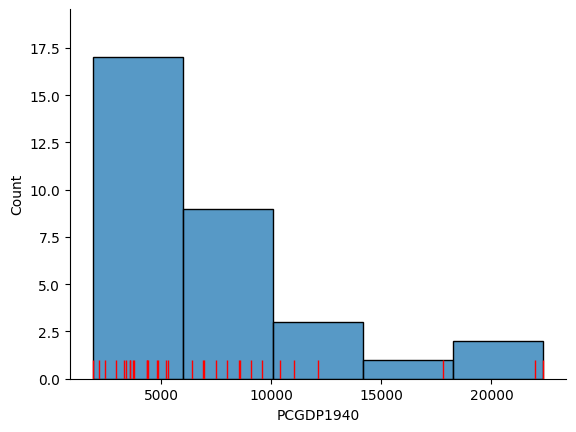

In [32]:
ax=seaborn.histplot(mx["PCGDP1940"], bins=5)
seaborn.rugplot(mx["PCGDP1940"], height=0.05, color="red", ax=ax);
seaborn.despine()

In [30]:
mx["PCGDP1940"].describe()

count       32.000000
mean      7230.531250
std       5204.952883
min       1892.000000
25%       3701.750000
50%       5256.000000
75%       8701.750000
max      22361.000000
Name: PCGDP1940, dtype: float64

In [33]:
counts, bins, patches = ax.hist(mx["PCGDP1940"], bins=5)

In [35]:
counts
#The counts object captures how many observations each category in the classification has:

array([17.,  9.,  3.,  1.,  2.])

In [36]:
bins
#The bin object stores these break points we are interested in when considering classification schemes 

array([ 1892. ,  5985.8, 10079.6, 14173.4, 18267.2, 22361. ])

In [37]:
import mapclassify

In [38]:
ei5 = mapclassify.EqualInterval(mx["PCGDP1940"], k=5)
ei5

EqualInterval               

      Interval         Count
----------------------------
[ 1892.00,  5985.80] |    17
( 5985.80, 10079.60] |     9
(10079.60, 14173.40] |     3
(14173.40, 18267.20] |     1
(18267.20, 22361.00] |     2

In [39]:
q5 = mapclassify.Quantiles(mx.PCGDP1940, k=5)
q5

Quantiles                   

      Interval         Count
----------------------------
[ 1892.00,  3576.20] |     7
( 3576.20,  4582.80] |     6
( 4582.80,  6925.20] |     6
( 6925.20,  9473.00] |     6
( 9473.00, 22361.00] |     7

In [42]:
q5.bins[1:] - q5.bins[:-1]

array([ 1006.6,  2342.4,  2547.8, 12888. ])

- avoids the pitfall of sparse classes

In [45]:
#Set seed for reproducibility

numpy.random.seed(12345)

#Generate a variable of 20 values randomly
#selected from 0 to 10

x = numpy.random.randint(0, 10, 20)

#Manually ensure the first 10 values are 0

x[0:10] = x.min()
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 6, 0, 2, 9, 1, 2, 6, 7])

In [46]:
# run quantile classification

In [47]:
ties = mapclassify.Quantiles(x, k=5)
ties


#sample does not contain enough values to form the number of well-defined classes requested

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Quantiles           

  Interval     Count
--------------------
[0.00, 0.00] |    11
(0.00, 1.40] |     1
(1.40, 6.20] |     4
(6.20, 9.00] |     4

In [49]:
ux = numpy.unique(x)
ux

array([0, 1, 2, 6, 7, 9])

In [50]:
### Third classifier uses sample mean and sample standard deviation

In [51]:
msd = mapclassify.StdMean(mx["PCGDP1940"])
msd

StdMean                     

      Interval         Count
----------------------------
(    -inf, -3179.37] |     0
(-3179.37,  2025.58] |     1
( 2025.58, 12435.48] |    28
(12435.48, 17640.44] |     0
(17640.44, 22361.00] |     3

- This classifier is best used when data is normally distributed or, at least, when the sample mean is a meaningful measure to anchor the classification around

In [ ]:
## Maximum breaks